In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from collections import OrderedDict

font = {'family' : 'DejaVu Sans',
        'weight': 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

bar_codes = ['#7293cb', '#e1974c', '#84ba5b', '#d35e60', '#808585', '#9067a7',
             '#ab6857', '#ccc210']
line_codes = ['#396ab1', '#da7c30', '#3f9651', '#cc2529', '#535154', '#6b4c9a',
              '#922428', '#948b3d']

In [ ]:
cpu_timeings = pd.read_csv('resultscpu.txt', sep=' ', header=None)
cpu_timeings.columns = ['num_blocks', 'seconds']
cpu_timeings.seconds = cpu_timeings.seconds * 1000
gpu_timeings = pd.read_csv('resultsgpu.txt', sep=' ', header=None)
gpu_timeings.columns = ['num_blocks', 'seconds']
gpu_timeings.seconds = gpu_timeings.seconds * 1000

42
3.2587800000000002


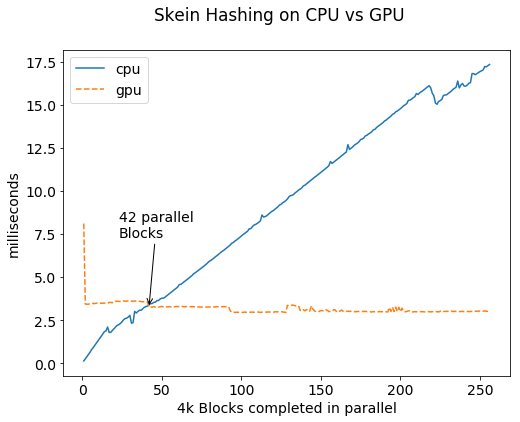

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(cpu_timeings.num_blocks, cpu_timeings.seconds)
ax.plot(gpu_timeings.num_blocks, gpu_timeings.seconds, ls='--')


gpu_overtake_blocks = None
gpu_overtake_blocks = None

for g in range(len(gpu_timeings.seconds)):
    if gpu_timeings.seconds[g] < cpu_timeings.seconds[g]:
        gpu_overtake_blocks = gpu_timeings.num_blocks[g]
        gpu_overtake_seconds = gpu_timeings.seconds[g]
        print(gpu_overtake_blocks)
        print(gpu_overtake_seconds)
        break
ann_str = "{} parallel\nBlocks".format(gpu_overtake_blocks)
ax.annotate(ann_str, xy=(gpu_overtake_blocks, gpu_overtake_seconds),
            arrowprops=dict(arrowstyle="->"),
            xytext=(-30, +70), textcoords='offset points')
ax.legend(('cpu', 'gpu'))
ax.set_ylabel('milliseconds')
ax.set_xlabel('4k Blocks completed in parallel')
fig.suptitle("Skein Hashing on CPU vs GPU")
#plt.show()
plt.savefig('skein_hash_cpu_gpu.png')

In [ ]:
for g in range(len(gpu_timeings.seconds)):
    if gpu_timeings.seconds[g] < cpu_timeings.seconds[g]:
        print(gpu_timeings.seconds[g], gpu_timeings.num_blocks[g], g)
        print(cpu_timeings.seconds[g], cpu_timeings.num_blocks[g], g)
        break
    

In [ ]:
gpu_timeings[40:60]